# **Molecular Phylogenetics**
## **Alignment Preparation and Tree Construction**
> Done by Ilia Popov

**Disclamer**: outputs of almost all commands are hidden. Because I have already executed them, the files are received. Many programs don't want to overwrite their output. I could write `--redo` everywhere, but I want to keep the code clean and clear.

### **0) Introduction**

> For this work, we will use the alignment of [SUP35 gene](https://www.yeastgenome.org/locus/S000002579) obtained by `prank` considering codons

In [ ]:
prank -codon -d=data/SUP35_10seqs.fa -o=data/SUP35_aln_prank.best.fas -F

### **1) Programmes used** <a class="anchor" id="1-bullet"></a>

| Program| Version|
| ------------- |:-------------:|
|trimal|[1.4.1](https://anaconda.org/bioconda/trimal)|
|raxml-ng|[1.2.1](https://anaconda.org/bioconda/raxml-ng)|
|modeltest-ng|[0.1.7](https://anaconda.org/bioconda/modeltest-ng)|
|iqtree|[2.2.6](https://anaconda.org/bioconda/iqtree)|

- OS: Windows 11, WSL2 (Ubuntu 22.04)
- CPU: Intel Xeon E5 2670v3 (12 cores/24 threads)
- RAM: 32GB (16GB for WSL2)

Tree building pipeline overview:

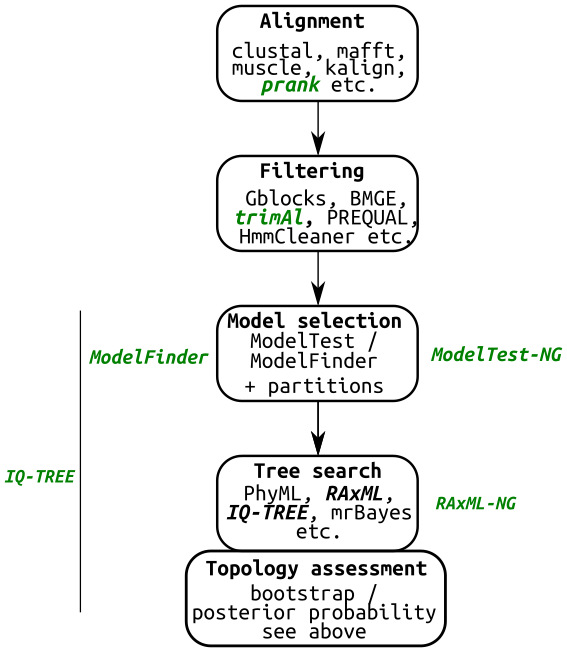

### **2) Cutting bad sections out of the alignment using trimAl** <a class="anchor" id="2-bullet"></a>

In [ ]:
! trimal -in data/SUP35_aln_prank.best.fas -out data/SUP35_aln_prank.trim.fas -automated1

### **3) Selection of an evolution model in ModelTest (ModelTest-NG)** <a class="anchor" id="3-bullet"></a>
>Which evolutionary model(s) was found to be most suitable for our alignment?<br>

In [ ]:
! modeltest-ng -i data/SUP35_aln_prank.trim.fas -o data/modeltest/SUP35_trim_modeltest

                         Model         Score        Weight
       BIC             TIM3+G4    18180.5614        0.3950
       AIC           TIM3+I+G4    18041.1550        0.5377
      AICc           TIM3+I+G4    18041.1550        0.5377

In total we see that the model `TIM3+G4` is recognised as the best!

### **4) Build an ML tree in RAxML-NG using the selected model** <a class="anchor" id="4-bullet"></a>
> Let's focus on the BIC for consistency.

First, let's check that our tree is being built at all

In [ ]:
! raxml-ng --check --msa data/SUP35_aln_prank.trim.fas  --model TIM3+G4 --prefix data/raxml/SUP35_raxml_test

`Alignment can be successfully read by RAxML-NG.`<br>
Great! Let's go!

In [ ]:
! raxml-ng --msa data/SUP35_aln_prank.trim.fas --model TIM3+G4 --prefix data/raxml/SUP35_raxml --threads 2 --seed 222  --outgroup SUP35_Kla_AB039749

### **5) Drawing the resulting tree (best ML-tree)** <a class="anchor" id="5-bullet"></a>

In [ ]:
! Rscript scripts/draw_tree.R data/raxml/SUP35_raxml.raxml.bestTree imgs/SUP35_raxml.png

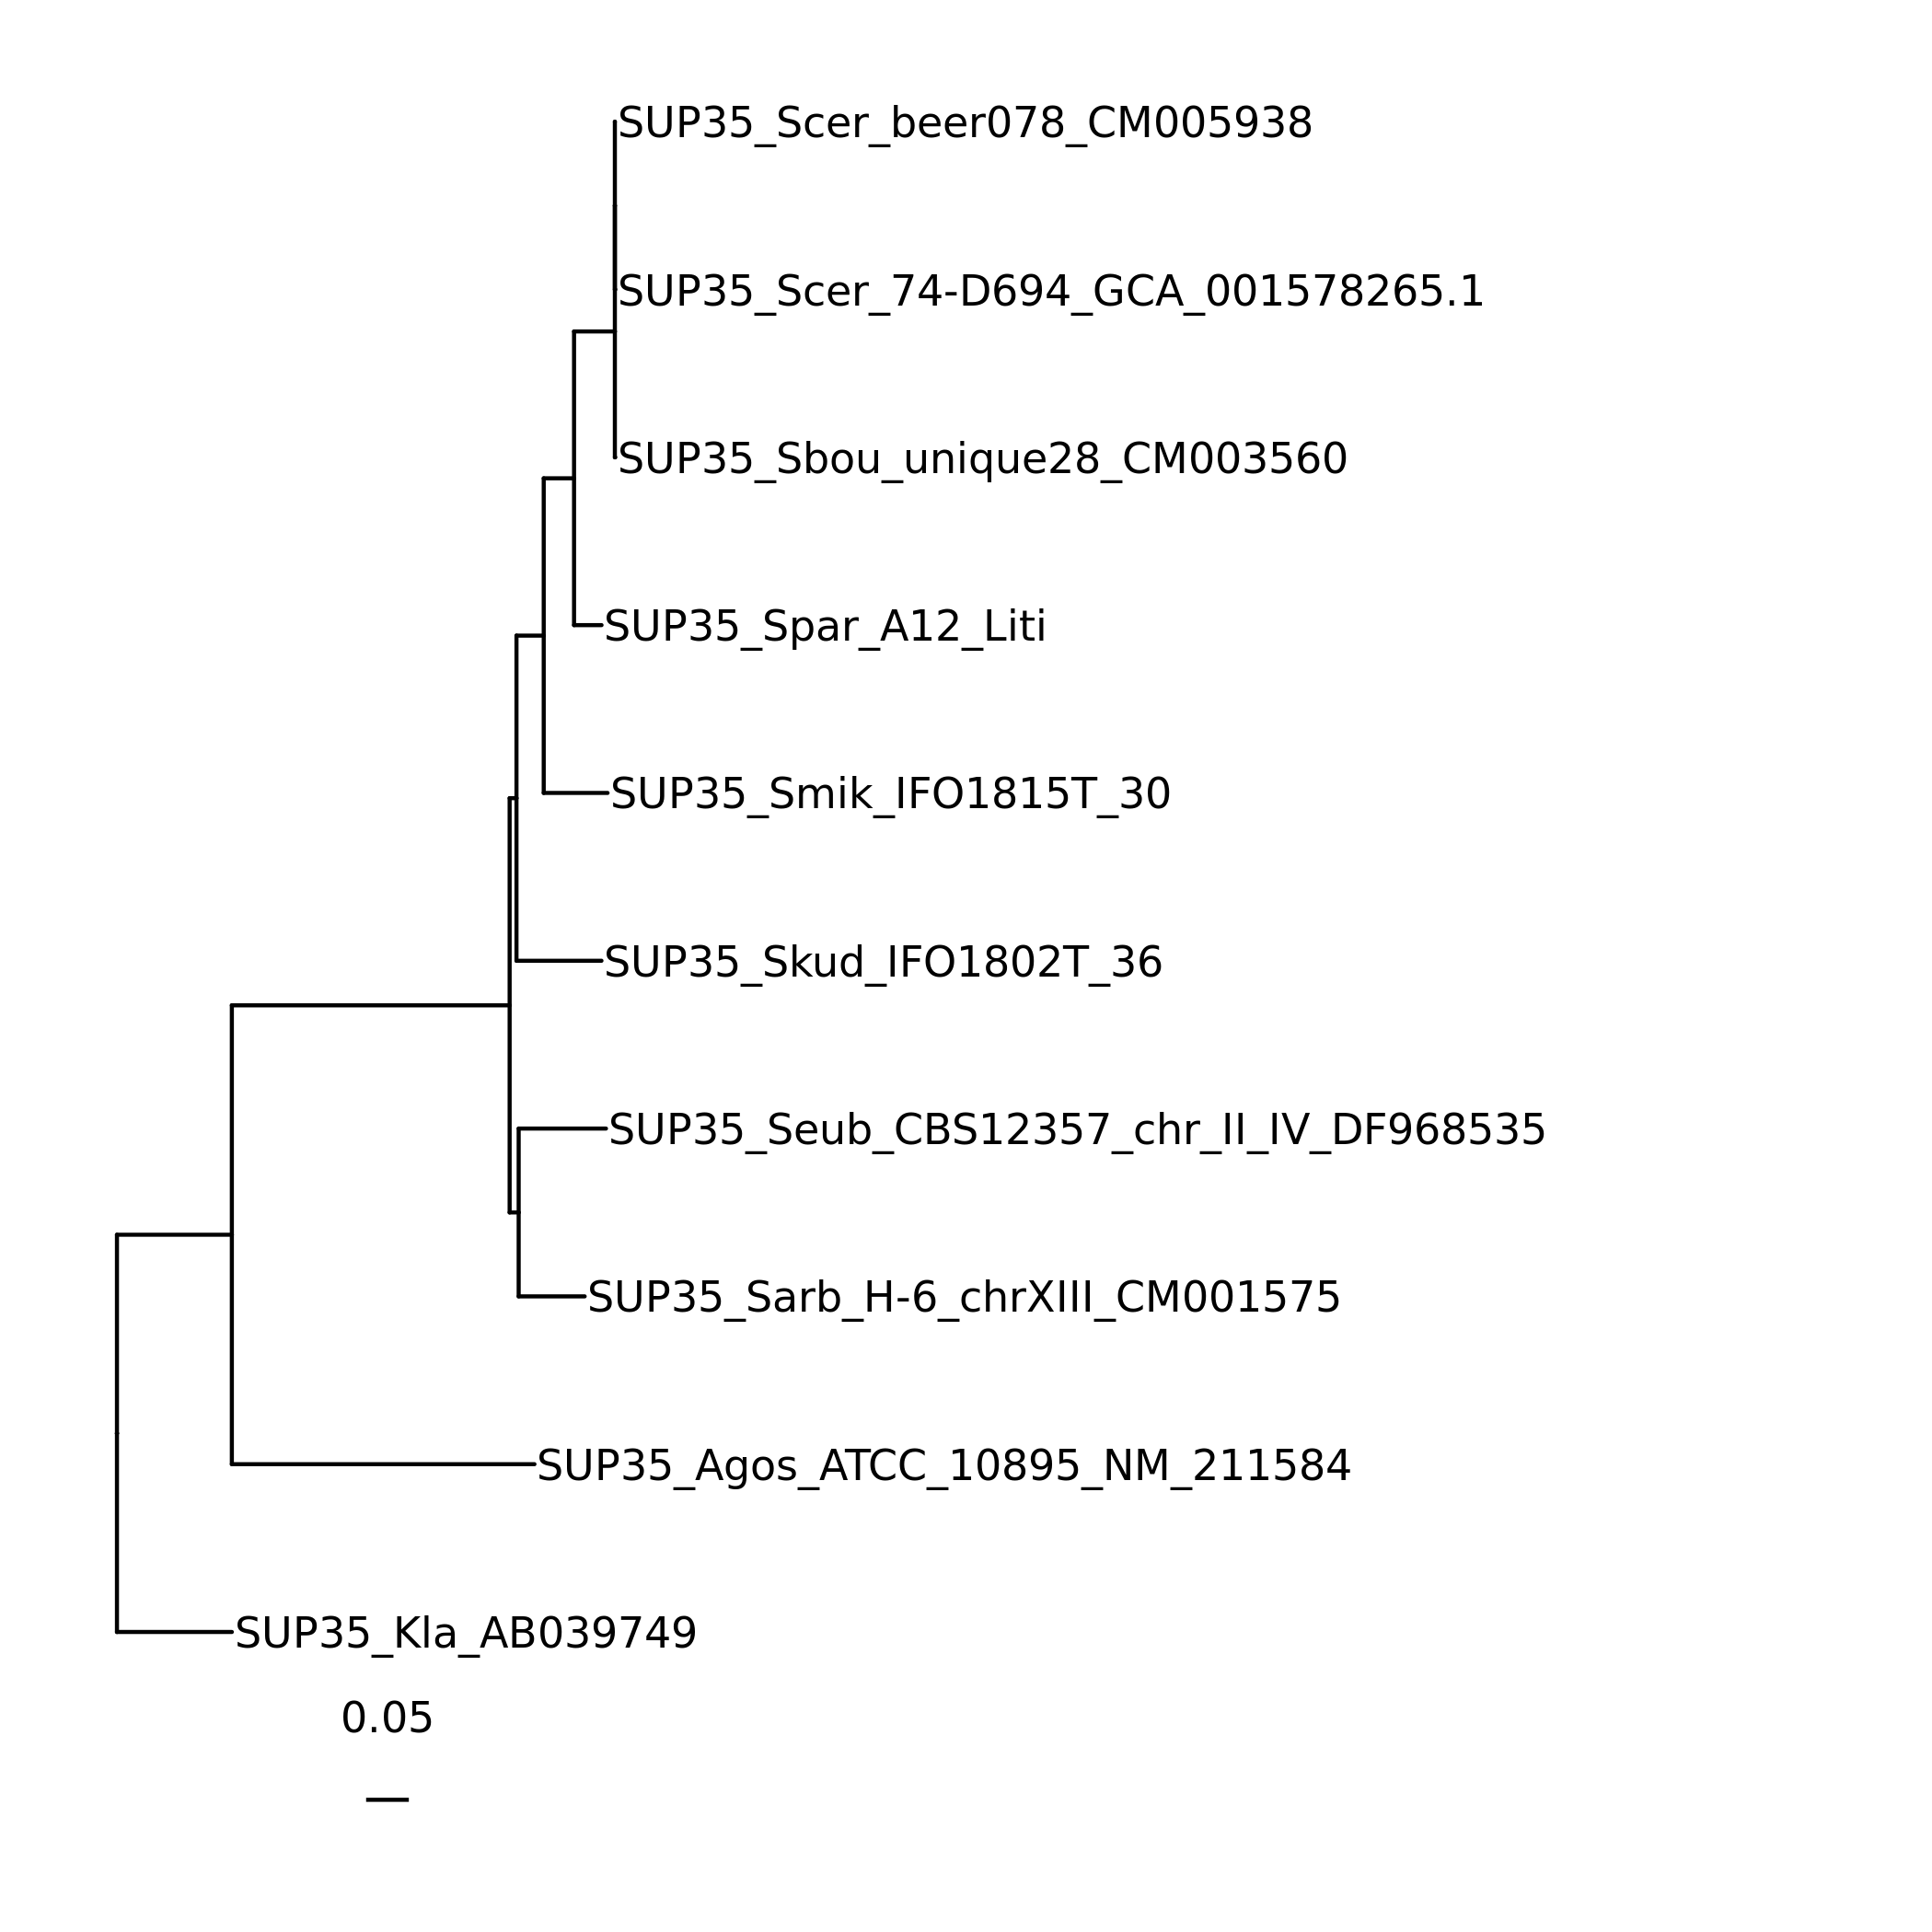

### **6) Selecting a model in ModelFinder (IQ-TREE)** <a class="anchor" id="6-bullet"></a>
>Which model of evolution was found to be most suitable for our alignment?<br>
> (Copy the desired part of the program output).

In [ ]:
! iqtree2 -m MFP -s data/SUP35_aln_prank.trim.fas --prefix data/modelfinder/SUP35_MF2

In [15]:
! head -42 data/modelfinder/SUP35_MF2.iqtree | tail -6

Best-fit model according to BIC: TIM3+F+G4

List of models sorted by BIC scores: 

Model                  LogL         AIC      w-AIC        AICc     w-AICc         BIC      w-BIC
TIM3+F+G4         -8993.686   18035.372 +   0.0517   18035.972 +   0.0549   18170.092 +    0.737


In total we see that the model `TIM3+F+G4` is recognised as the best!

### **7) Do the models selected by ModelTest and ModelFinder differ, and how much? "** <a class="anchor" id="7-bullet"></a>

In general, we got the same thing. Only `ModelFinder` has also thrown in information about the empirical frequencies of the letters themselves in the alignment.

|   |ModelTest|ModelFinder|
|---|---------|-----------|
|Model|TIM3+G4|TIM3+F+G4|
|BIC|18180.5614|18170.092|

### **8) Build an ML-tree in IQ-TREE using the selected model.** <a class="anchor" id="8-bullet"></a>

In [ ]:
! iqtree2 -m TIM3+F+G4 -s data/SUP35_aln_prank.trim.fas --prefix data/iqtree/SUP35_iqtree

### **9) Drawing the resulting tree (best ML-tree)** <a class="anchor" id="9-bullet"></a>

In [ ]:
! Rscript scripts/draw_tree.R data/iqtree/SUP35_iqtree.treefile imgs/SUP35_iqtree.png

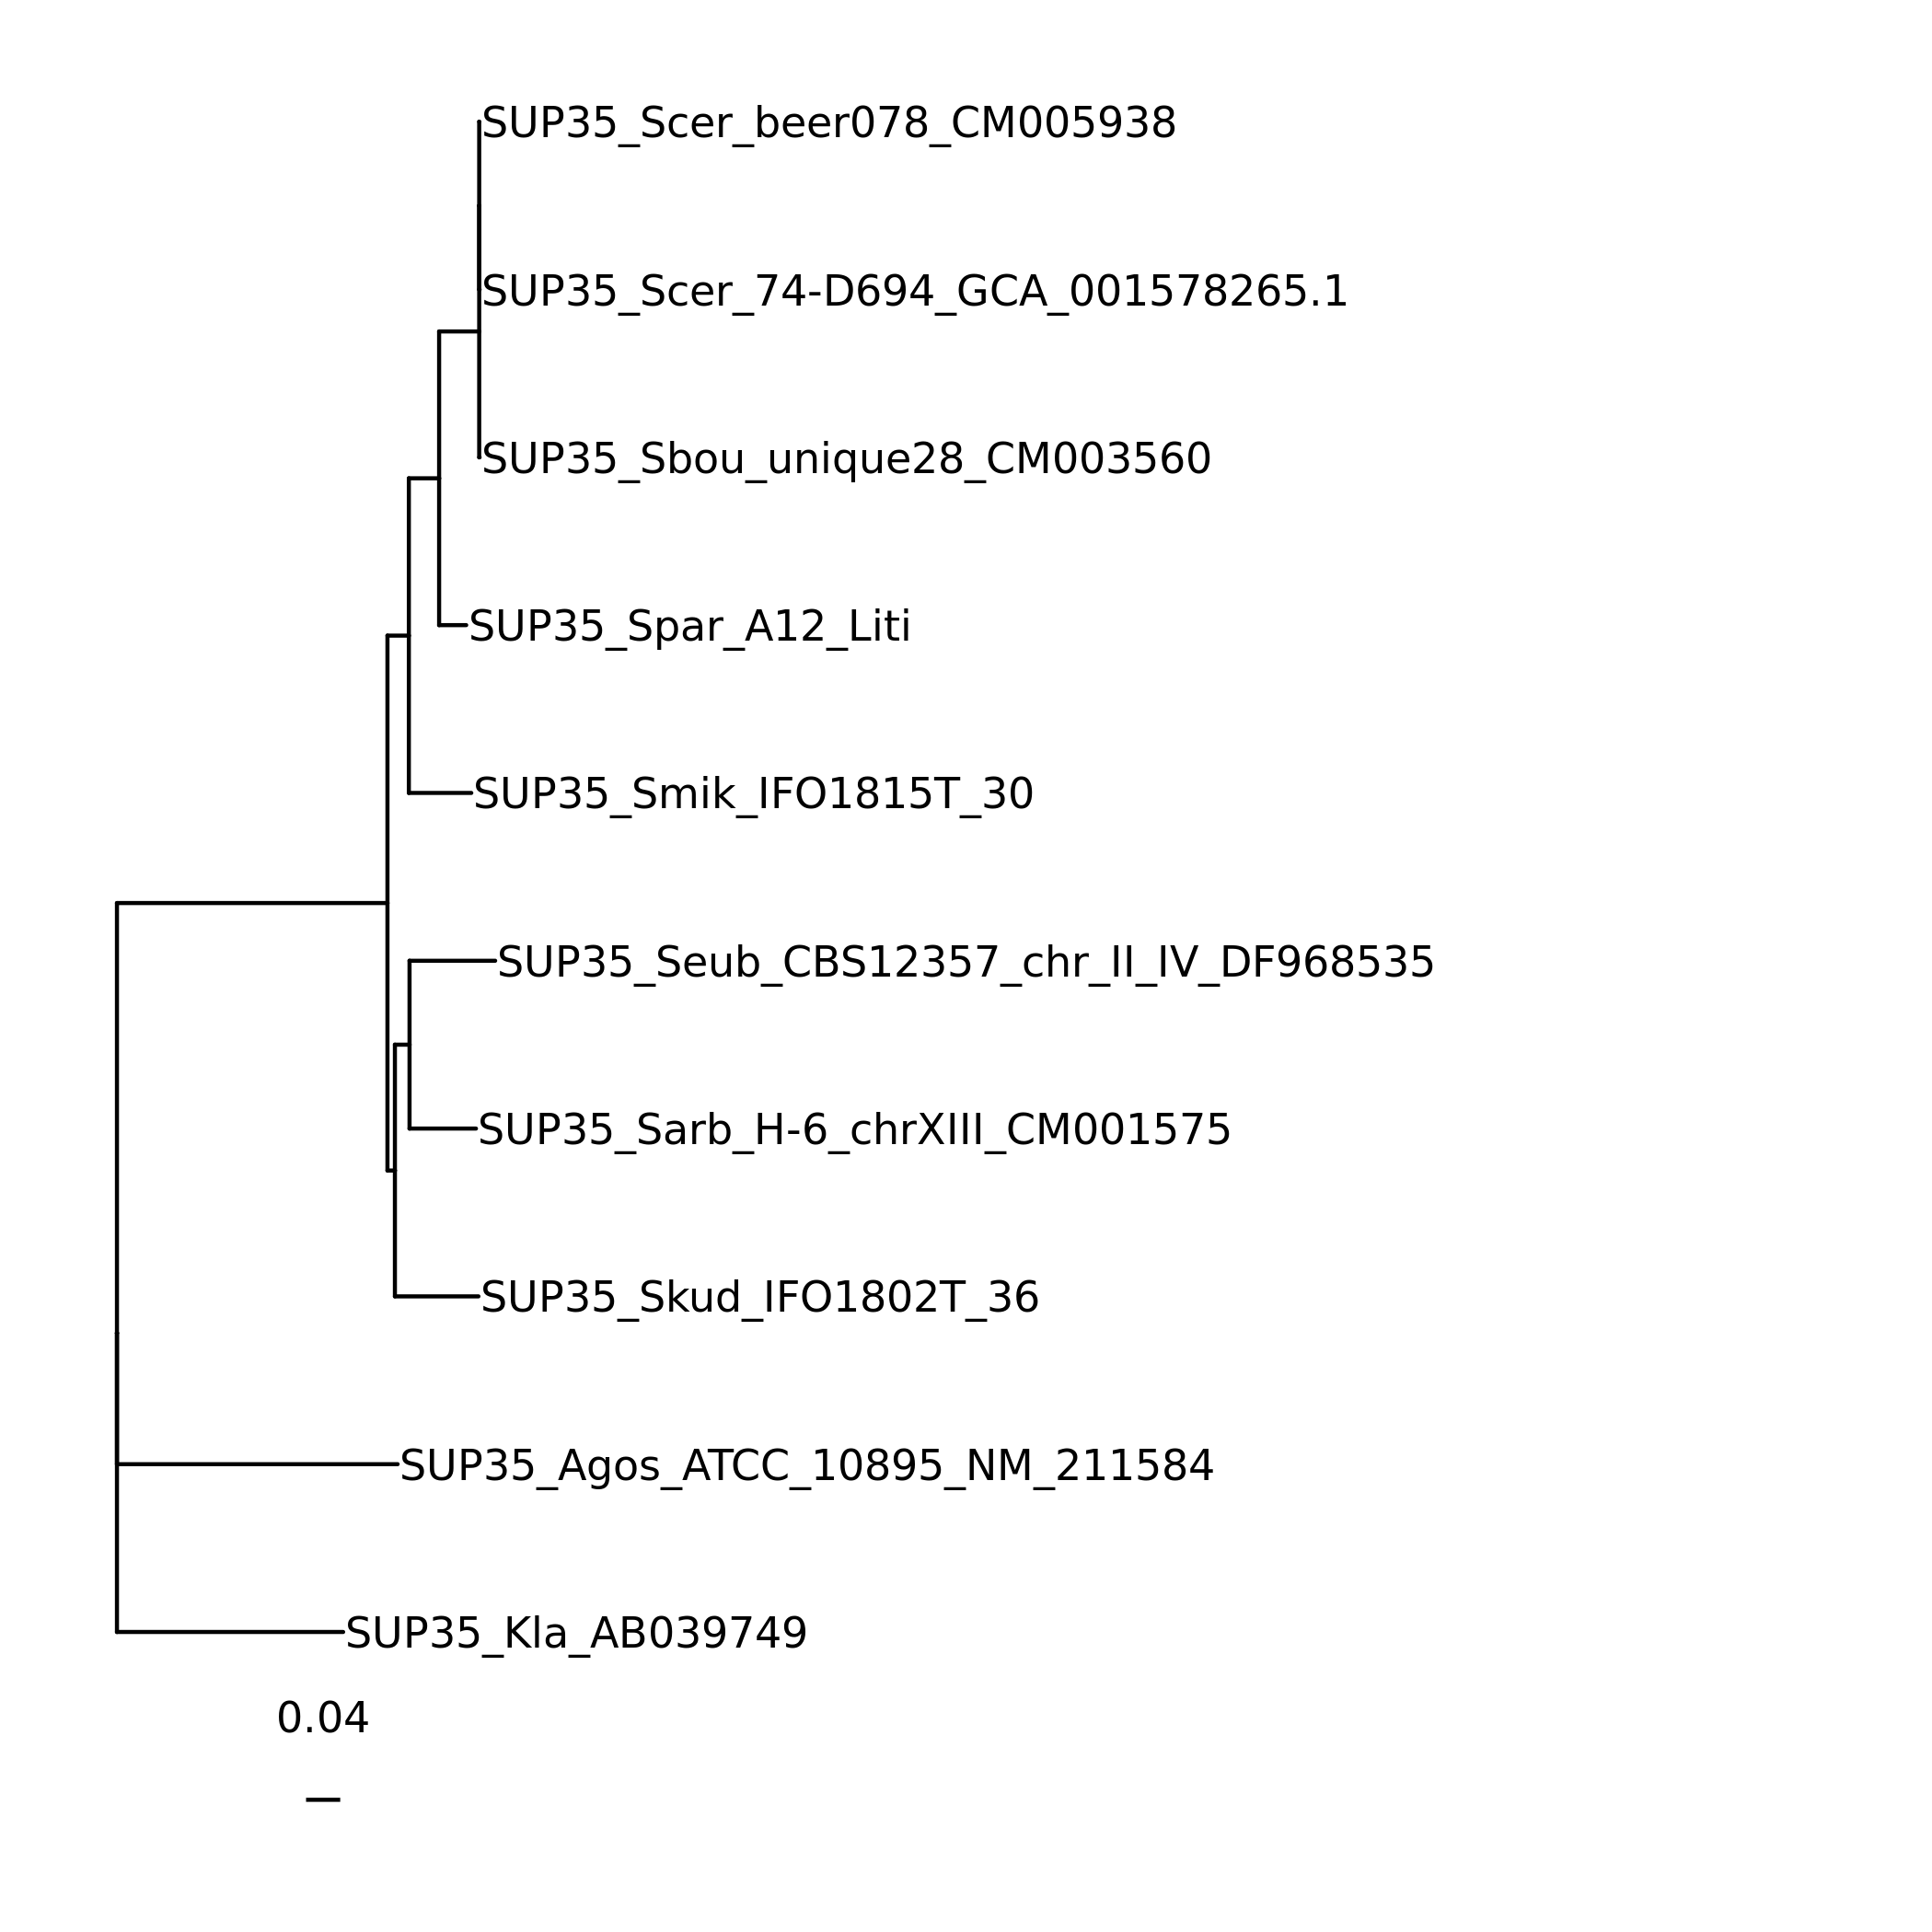

The trees obtained with RAxML and IQTREE are fundamentally similar. They have different views on how well the outer groups diverge, and they have different topologies.

### **10) Comparison of likelihood (log likelihood) of trees obtained with different models, as well as before and after filtering** <a class="anchor" id="10-bullet"></a>
> What conclusion can be drawn from this?<br>

The basic command for all commands is as follows:
```bash
iqtree2 -s SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre SUP35_TIM3
```

In [ ]:
! iqtree2 -s data/SUP35_aln_prank.best.fas -pre data/iqtree_unfilt/SUP35_iqtree_unfilt

In [16]:
! grep "Log-likelihood" data/iqtree_unfilt/SUP35_iqtree_unfilt.iqtree

Log-likelihood of the tree: -9696.9044 (s.e. 160.3706)


In [17]:
! grep "Log-likelihood" data/iqtree/SUP35_iqtree.iqtree

Log-likelihood of the tree: -8993.1633 (s.e. 149.1347)


In [ ]:
! iqtree2 -s data/SUP35_aln_prank.best.fas -m JC -pre data/iqtree_JC/SUP35_iqtree_JC

In [18]:
! grep "Log-likelihood" data/iqtree_JC/SUP35_iqtree_JC.iqtree

Log-likelihood of the tree: -10482.7253 (s.e. 176.1729)


|Model|Unfilt|TIM3+F+G4|JC|
|-----|------|---------|--|
|Log-likelihood|-9696.9044|-8993.1633|-10482.7253|


- Before filtering `Log-likelihood` = -9696.9044
- When using the model `TIM3+F+G4` = -8993.1633
- When using the `JC` model = -10482.7253<br>

Moreover, the topology is the same everywhere! In general, if we only need to look at the topology, then we can run iqtree with any model...

### **11) Running the basic command, but generating 100 replicas of a regular bootstrap** <a class="anchor" id="11-bullet"></a>

In [ ]:
! time iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -redo -pre data/iqtree_bootstrap/SUP35_TIM3_b -b 100

### **12) Running the basic command, but generating 1000 replicas of ultrafast bootstrap** <a class="anchor" id="12-bullet"></a>

In [ ]:
! time iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -redo -pre data/iqtree_ultrafast_bootstrap/SUP35_TIM3_ufb -bb 1000

### **13) What is the relationship between the running time of regular and ultrafast bootstrap (per repetition) and the obtained values?** <a class="anchor" id="14-bullet"></a>

Generating 100 replicas of regular bootstrap took `3:17.00`, while generating 1000 replicas of ultrafast bootstrap took `3.258`. That's a huge difference!

In [1]:
bootstrap_100 = 3 * 60 + 17
ultrafast_bootstrap_1000 = 3.258

print(f'Generating ultrafast bootstrap is faster in: {bootstrap_100 / ultrafast_bootstrap_1000} times')

Generating ultrafast bootstrap is faster in: 60.46654389195826 times


### **14) Running the previous command, but with generation: 1000 ultrafast bootstrap + 1000 alrt + abayes** <a class="anchor" id="14-bullet"></a>

In [ ]:
! iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre data/iqtree_ufb_alrt_abayes/SUP35_TIM3_B_alrt_abayes -bb 1000 -alrt 1000 -abayes

### **15) Drawing the resulting tree with three supports** <a class="anchor" id="15-bullet"></a>
> How do the values ​​relate?<br>
> What conclusion can we draw from this?

In [ ]:
! Rscript scripts/draw_tree_max.R data/iqtree_ufb_alrt_abayes/SUP35_TIM3_B_alrt_abayes.treefile imgs/SUP35_TIM3_B_alrt_abayes.png

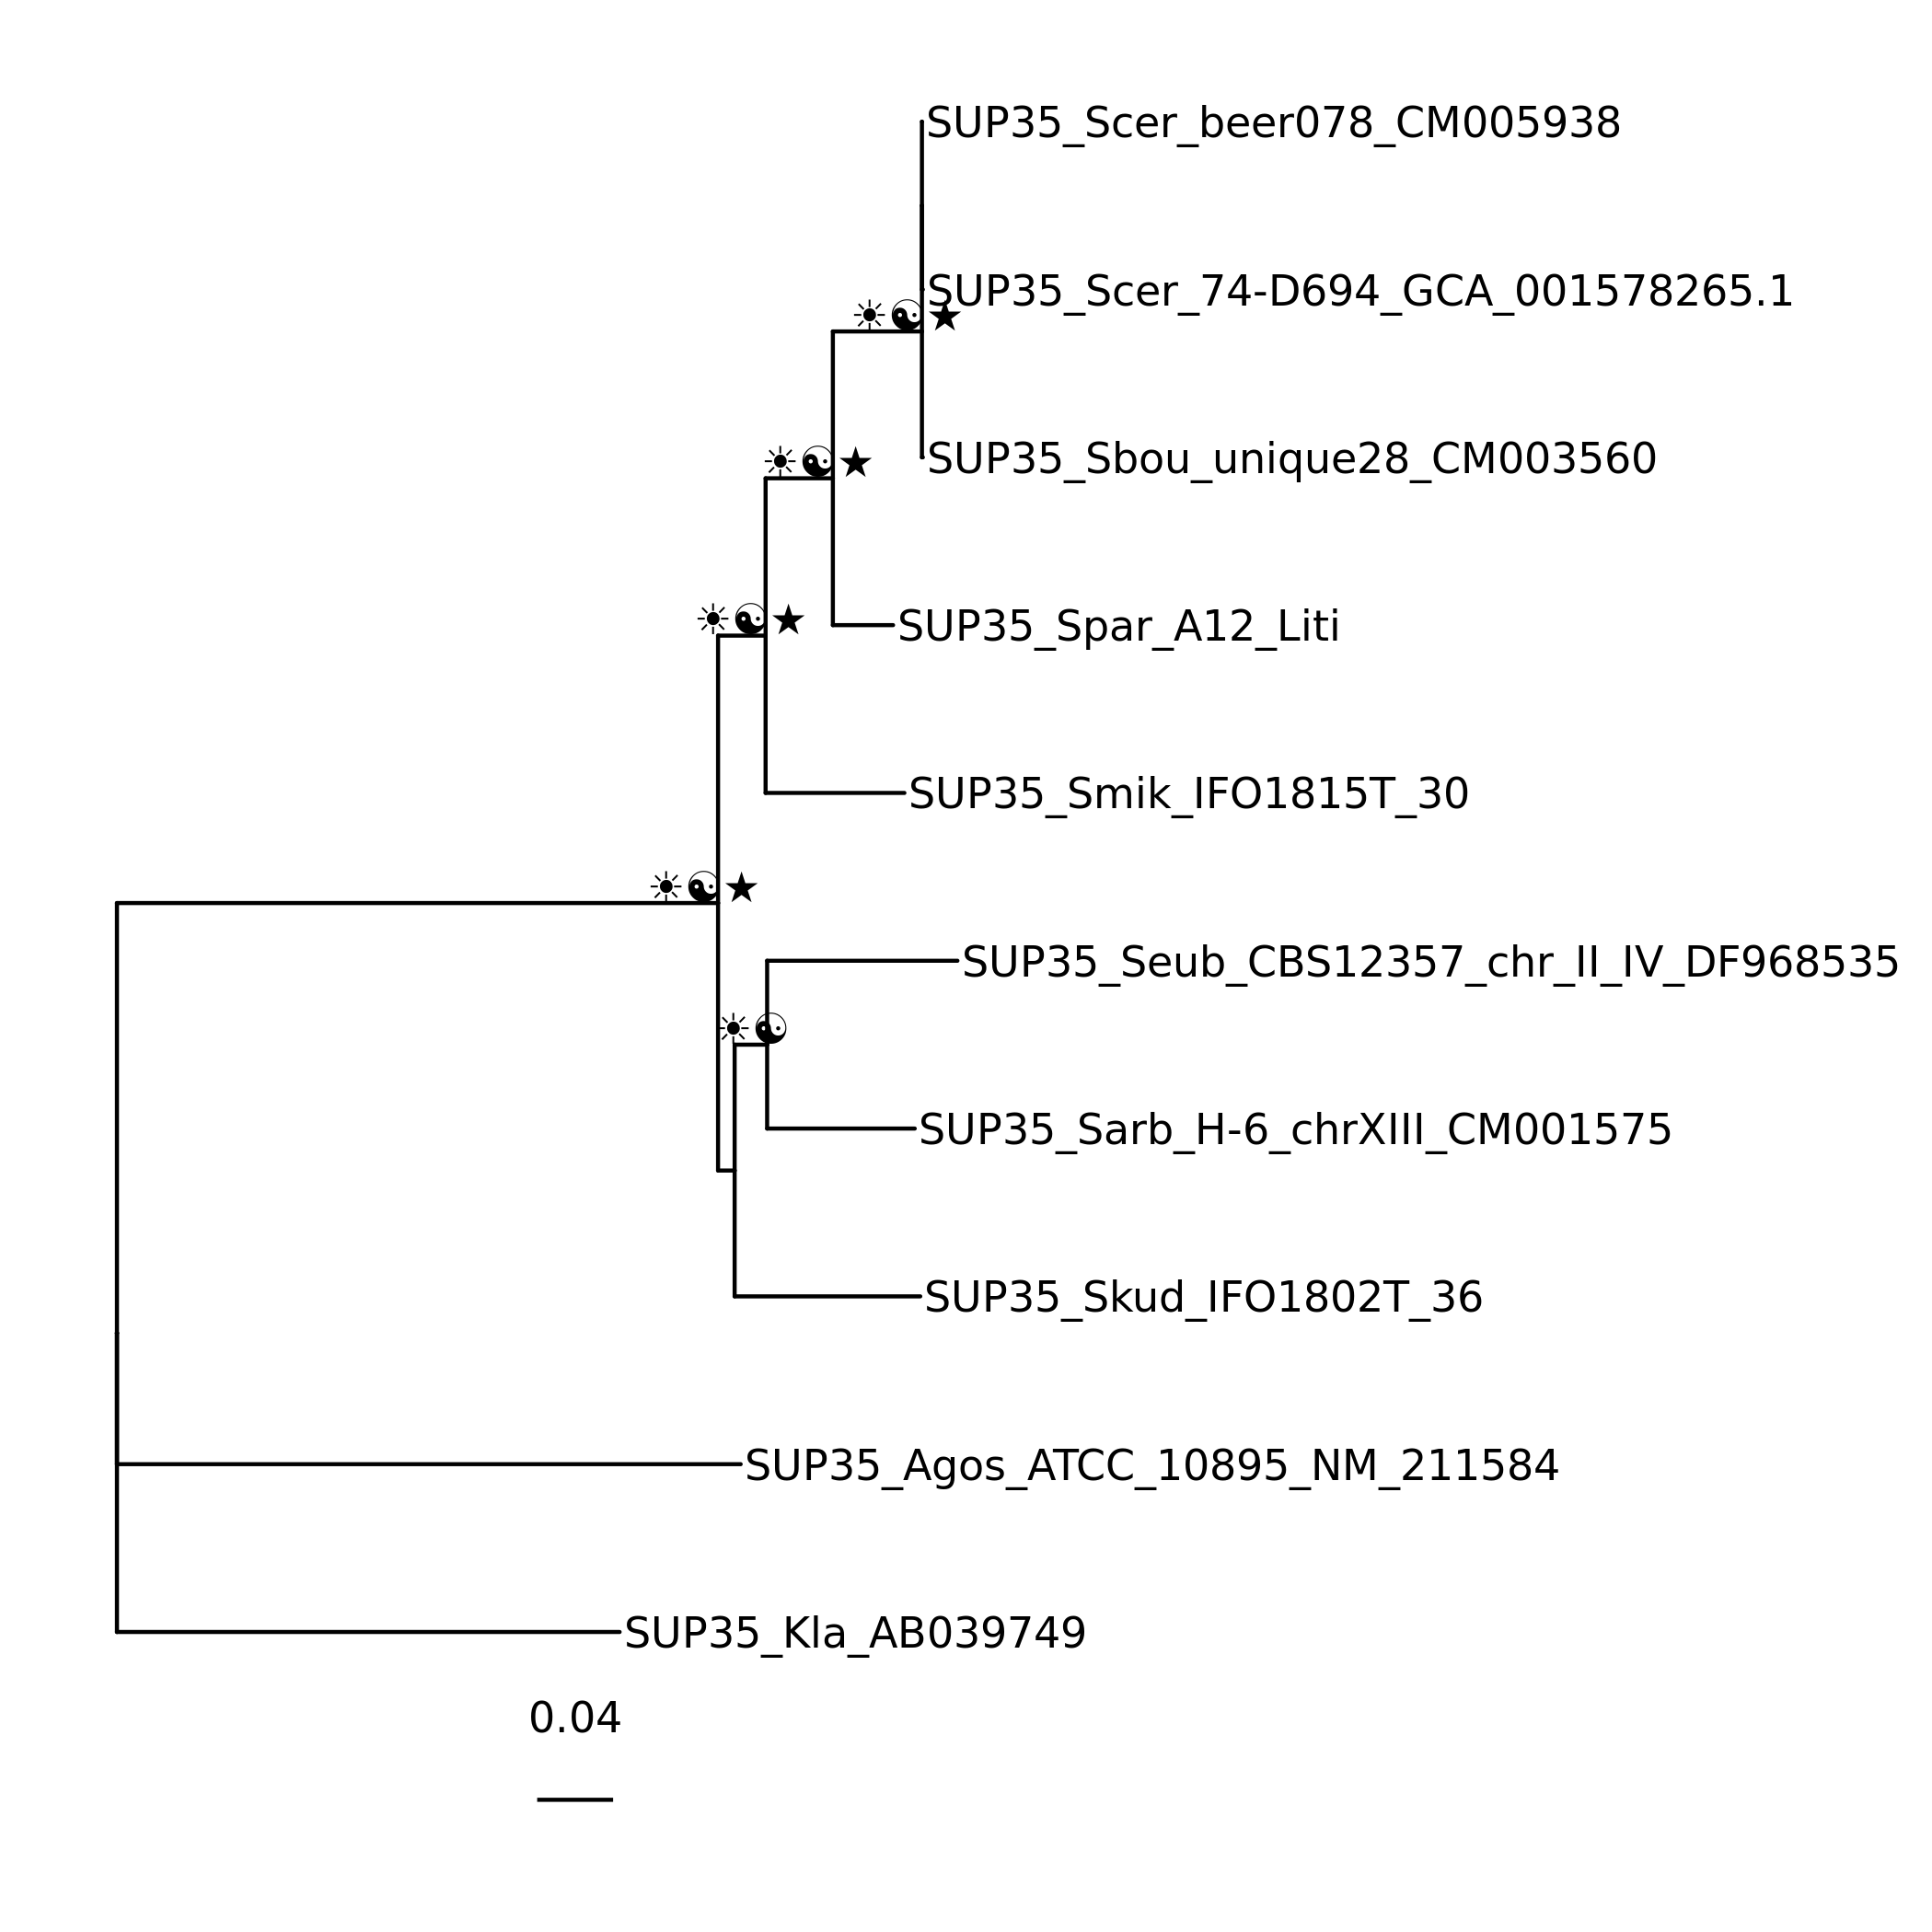

All values ​​- `alrt`, `abayes` and `ufb` are positively correlated - that is, if the indicators are high, then they are all high, as a rule. But this is not proportional.<br>
In the tree above, the indicator values ​​are replaced with the symbols of the sun, yin-yang and asterisk for educational purposes. In real life they don’t use this, but giving bare numbers through a slash is also not comme il faut...